In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
count_mice = len(merged_data['Mouse ID'].value_counts())

In [3]:

print(f'there are {count_mice} mice in this data set')

there are 249 mice in this data set


In [4]:

merged_data[merged_data.duplicated(subset= ["Mouse ID", "Timepoint"], keep= 'first')]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
merged_data[merged_data["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
droped_mouse = merged_data[merged_data["Mouse ID"]!="g989"]
droped_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:


count_mice2 = len(droped_mouse["Mouse ID"].value_counts())
print(f'There are {count_mice2} mice in this data set')


There are 248 mice in this data set


## Summary Statistics

In [8]:
df_mean = droped_mouse.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
df_median = droped_mouse.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
df_var = droped_mouse.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
df_std = droped_mouse.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
df_sem = droped_mouse.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
mouse_id = droped_mouse['Mouse ID']
timepoint = droped_mouse['Timepoint']
tumor_vol = droped_mouse['Tumor Volume (mm3)']
drug_reg = droped_mouse['Drug Regimen']
summary_stats_df = pd.DataFrame({
    "Mean": df_mean,
    "Median": df_median,
    "Variance": df_var,
    "Standard Deviation": df_std,
    "Standard Error Mean": df_sem
})
summary_stats_df

,Mean,Median,Variance,Standard Deviation,Standard Error Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:

agg_summary_stats = droped_mouse.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']
})
agg_summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

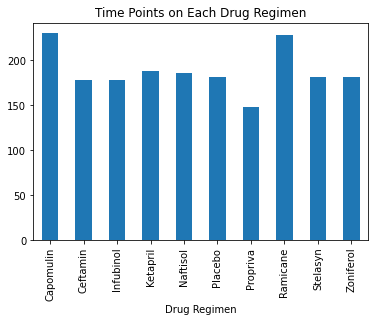

In [10]:
small_grouped_df = droped_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()
small_grouped_df
regimen_bar = small_grouped_df.plot(kind='bar', title='Time Points on Each Drug Regimen')


Text(0, 0.5, 'Number of mice tested')

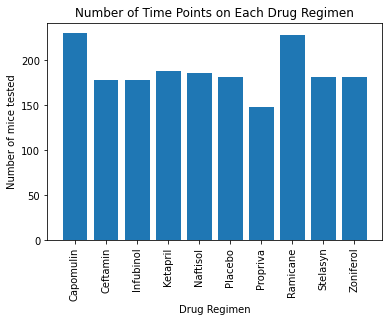

In [11]:
# plt.bar(drug_reg, timepoint, color='r', alpha=0.5, align="center")
# droped_mouse['Drug Regimen'].value_counts().plot(kind= "bar")
x_axis = [value for value in range(len(merged_data['Drug Regimen'].unique()))]
y_axis = small_grouped_df
plt.bar(x_axis, y_axis)

x_name = droped_mouse['Drug Regimen'].unique().tolist()
x_name.sort()
plt.xticks(x_axis, x_name, rotation="vertical")
plt.title("Number of Time Points on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")


In [12]:
droped_mouse["Sex"].value_counts()

Male      958
Female    922
Name: Sex, dtype: int64

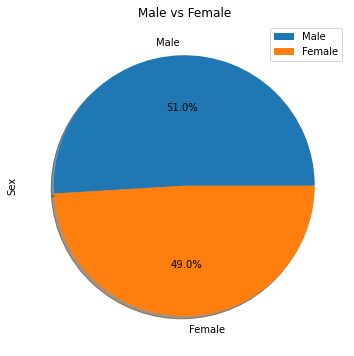

In [13]:
#Pandas
gender_count = droped_mouse["Sex"].value_counts()
gender_count
gender_df = pd.DataFrame(gender_count)
gender_df
pandas_pie_plot = gender_df.plot.pie(y= 'Sex', figsize= (6,6), autopct= '%1.1f%%', shadow=True, title= 'Male vs Female')

Text(0, 0.5, 'Mouse ID')

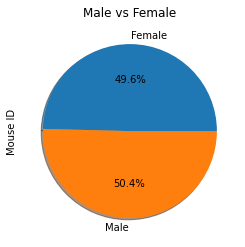

In [14]:
#PyPlot
labels = droped_mouse['Sex'].unique().tolist()
labels.sort()

sizes = droped_mouse.groupby('Sex')['Mouse ID'].nunique()

plt.pie(sizes, labels = labels, shadow= True, autopct= '%1.1f%%')
plt.title('Male vs Female')
plt.ylabel('Mouse ID')


In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


## Quartiles, Outliers and Boxplots

In [15]:
copy_clean = pd.DataFrame.copy(droped_mouse)
final_four = droped_mouse.set_index("Drug Regimen").loc[["Capomulin","Ramicane", "Infubinol","Ceftamin"]].reset_index()


final_four = final_four.groupby("Mouse ID")["Timepoint"].max()
final_four = pd.DataFrame(final_four).reset_index()


merged = pd.merge(copy_clean, final_four, on = ["Timepoint", "Mouse ID"])
merged


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [16]:
treatments = ["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]



lists = {}


quartiles = merged["Tumor Volume (mm3)"].quantile([.25,.50,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
IQR = upperq - lowerq

print(f"The lower quartile of Tumor Volume (mm3) is {lowerq}.")
print(f"The upper quartile of Tumor Volume (mm3) is {upperq}.")
print(f"The Interquartile range of Tumor Volume (mm3) is {IQR}.")
    

for treatment in treatments:
    for index, row in merged.iterrows():
        if row["Drug Regimen"] == treatment:
            lists.setdefault(treatment, []).append(row["Tumor Volume (mm3)"])
frame= pd.DataFrame(lists)
            
           

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f"Values below {lower_bound} are outliers")
print(f"Values above {upper_bound} are outliers")

The lower quartile of Tumor Volume (mm3) is 37.1877438025.
The upper quartile of Tumor Volume (mm3) is 59.930261755.
The Interquartile range of Tumor Volume (mm3) is 22.742517952499995.
Values below 3.0739668737500097 are outliers
Values above 94.04403868374999 are outliers


Text(0.5, 1.0, 'Variability of Top 4 Drug Regiments')

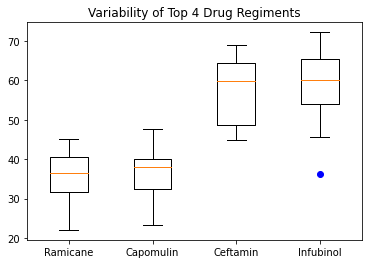

In [17]:
plt.boxplot([frame['Ramicane'], frame['Capomulin'], frame['Ceftamin'], frame['Infubinol']], labels = treatments, sym = 'b')
plt.title('Variability of Top 4 Drug Regiments')


## Line and Scatter Plots

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

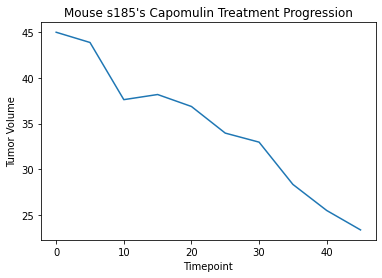

In [18]:
line_pl_s185 = droped_mouse.loc[droped_mouse["Drug Regimen"] == "Capomulin"].loc[droped_mouse["Mouse ID"] == "s185"]

lx_axis = line_pl_s185["Timepoint"].tolist()
ly_axis = line_pl_s185["Tumor Volume (mm3)"].tolist()
plt.plot(lx_axis, ly_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Mouse s185's Capomulin Treatment Progression")
lx_axis


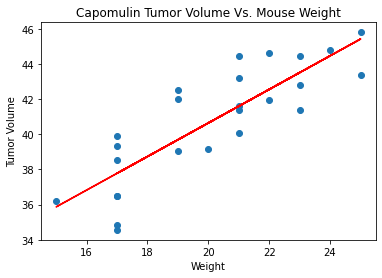

In [40]:
Capomulin_weight = droped_mouse.loc[droped_mouse["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()
sx_axis = Capomulin_weight["Weight (g)"]
sy_axis = Capomulin_weight["Tumor Volume (mm3)"]


correlation = st.pearsonr(sx_axis,sy_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sx_axis, sy_axis)
regress_values = sx_axis * slope + intercept

plt.scatter(sx_axis,sy_axis)
plt.title("Capomulin Tumor Volume Vs. Mouse Weight")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.plot(sx_axis,regress_values, "r-")

## Correlation and Regression

In [19]:
correlation = st.pearsonr(sx_axis,sy_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sx_axis, sy_axis)
regress_values = sx_axis * slope + intercept

print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"Linear Regressions Model: y = {round(slope, 2)}x + {round(intercept, 2)}")


NameError: name 'sx_axis' is not defined